In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('agaricus-lepiota.csv', header=None)

FileNotFoundError: [Errno 2] File agaricus-lepiota.csv does not exist: 'agaricus-lepiota.csv'

In [ ]:
df

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [14]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
def my_function(x):
    if x == 'b':
        return 'bell'
    elif x == 'c':
        return 'conical'
    elif x == 'x':
        return 'convex'
    elif x == 'f':
        return 'flat'
    elif x == 'k':
        return 'knobbed'
    else:
        return 'sunken'

df[1] = df[1].apply(my_function)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,convex,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,convex,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,bell,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,convex,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,convex,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,knobbed,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,convex,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,flat,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,knobbed,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [36]:
X = df.iloc[:,1:]

In [37]:
X

,1_convex,1_flat,1_knobbed,1_sunken,2_g,2_s,2_y,3_c,3_e,3_g,...,21_n,21_s,21_v,21_y,22_g,22_l,22_m,22_p,22_u,22_w
0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [38]:
df = pd.get_dummies(X, drop_first=True)

In [39]:
df

,1_convex,1_flat,1_knobbed,1_sunken,2_g,2_s,2_y,3_c,3_e,3_g,...,21_n,21_s,21_v,21_y,22_g,22_l,22_m,22_p,22_u,22_w
0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [40]:
X = X.values

In [41]:
X

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [42]:
y = df.iloc[:,0].values

In [43]:
y

array([1, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       925
           1       1.00      1.00      1.00       700

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [49]:
print(accuracy_score(y_test, y_pred))

1.0


In [50]:
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
model_C = CategoricalNB()
clf = model_C.fit(X_train, y_train)

In [53]:
pred_labels = model_C.predict_proba(X_test)

In [54]:
score = model_C.score(X_test,y_test)

In [55]:
print("Model Accuracy: %f" % score)

Model Accuracy: 1.000000


In [57]:
#print(classification_report(y_test, pred_labels))

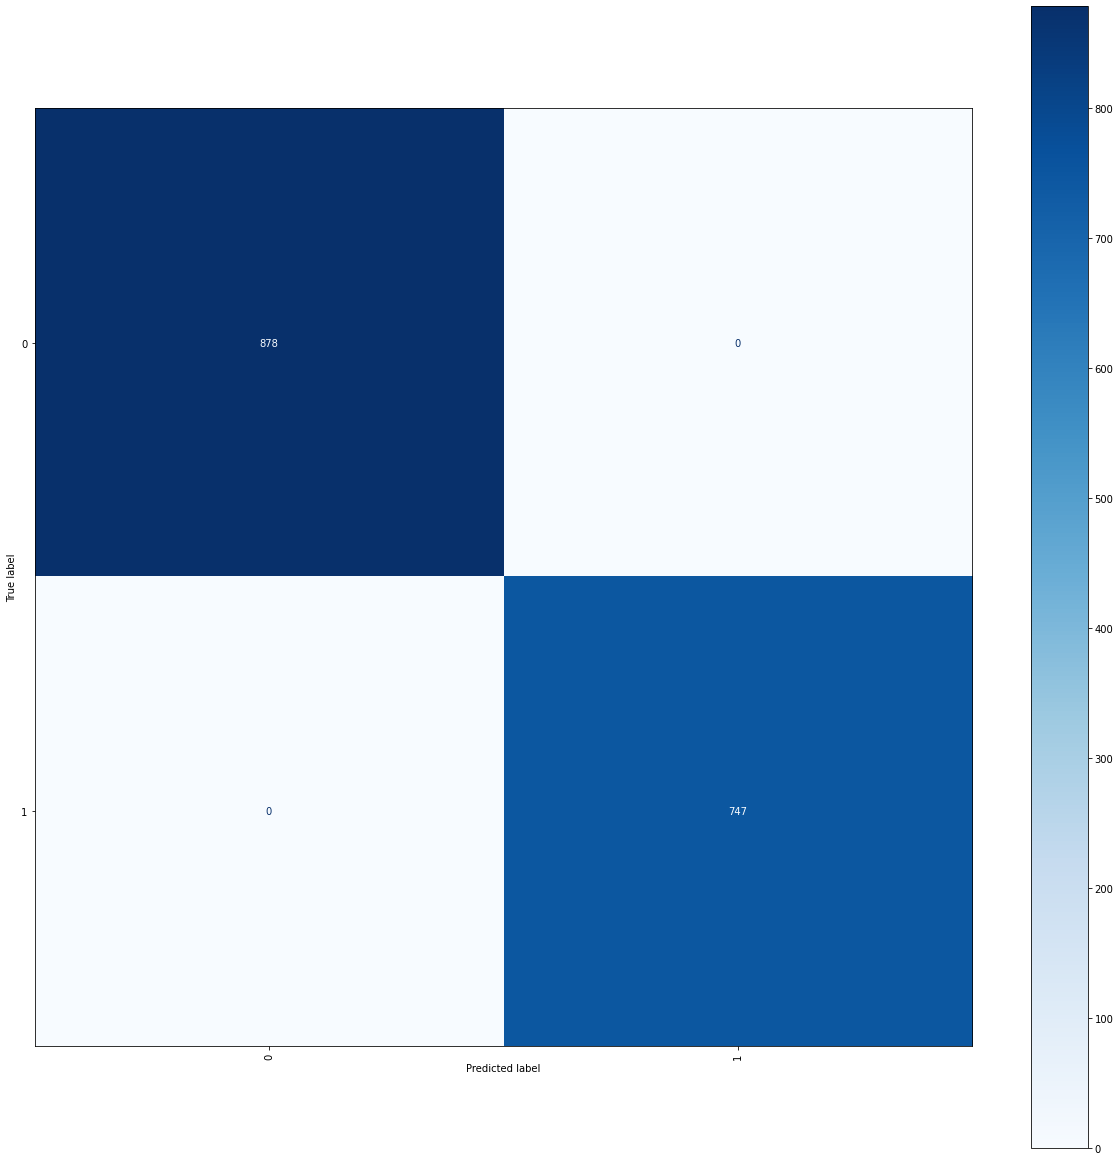

In [58]:
fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(model_C, X_test, y_test,
                             display_labels=model_C.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [59]:
rf_model = RandomForestClassifier()


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 1.000000


TypeError: object of type 'numpy.uint8' has no len()

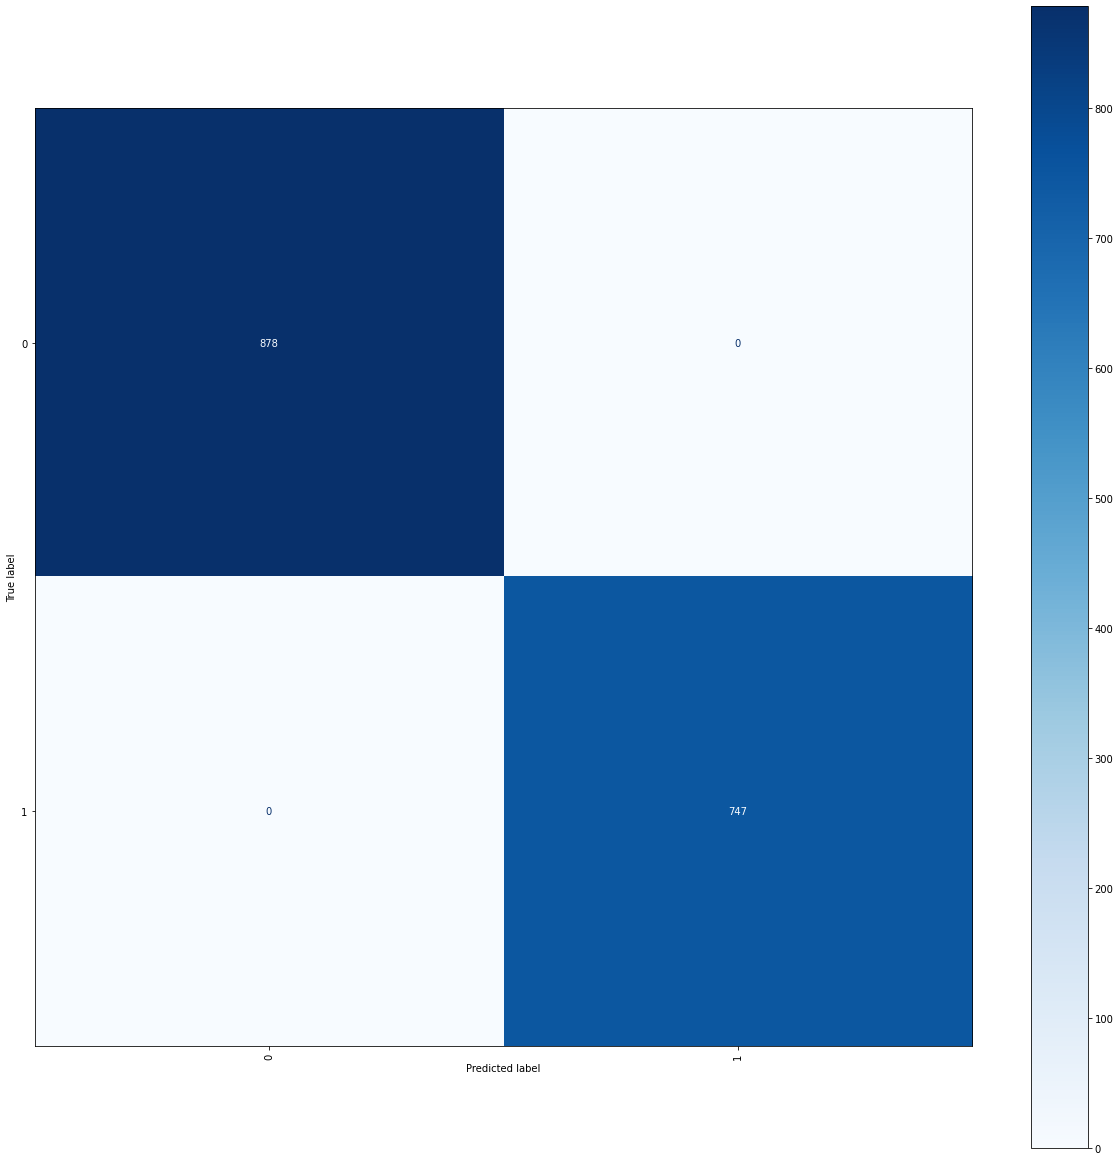

In [60]:
fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                             display_labels=rf_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp